# Homework 11 Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold # import KFold
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from ggplot import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor as RFR

/Users/liujingyi/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


## Model 1     Telco Customer Churn

### 1. Read and tidy the data

__Read the data__

In [2]:
# Read data
Customer = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
Customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


__Display the columns__

In [3]:
Customer.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

__Show statistic features and histograms of the numerical columns__

In [4]:
Customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


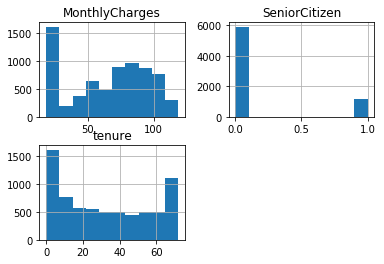

In [5]:
Customer.hist()
plt.show()

__Show the types of each columns__     
The type of TotalCharges should be int, so I change the datatype

In [6]:
Customer.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
Customer['TotalCharges'] = pd.to_numeric(Customer.TotalCharges, errors='coerce')
Customer.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
Customer = Customer.dropna()
Customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
Customer.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### 2. Configure the data for machine learning      
In order to do machine learning, econde the categorical columns

In [10]:
Customer.gender = [1 if each == "Male" else 0 for each in Customer.gender]

col = ['Partner', 
         'Dependents', 
         'PhoneService', 
         'MultipleLines',
         'OnlineSecurity',
         'OnlineBackup',
         'DeviceProtection',
         'TechSupport',
         'StreamingTV',
         'StreamingMovies',
         'PaperlessBilling', 
         'Churn']

for i in col:
    Customer[i] = [1 if each == "Yes" else 0 if each == "No" else 1 for each in Customer[i]]

    
Customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [11]:
Customer['InternetService'].unique().tolist()

['DSL', 'Fiber optic', 'No']

In [ ]:
Customer = Customer.replace('DSL',1).replace('Fiber optic',2).replace('No', 0)

In [13]:
Customer['InternetService'] = Customer['InternetService'].replace('DSL',1).replace('Fiber optic',2).replace('No', 0)

In [14]:
Customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,1,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,1,2,0,...,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1452-KIOVK,1,0,0,1,22,1,1,2,0,...,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,0,0,0,0,10,0,1,1,1,...,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,7892-POOKP,0,0,1,0,28,1,1,2,0,...,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,1,1,...,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [13]:
Customer['Contract'].unique().tolist()

['Month-to-month', 'One year', 'Two year']

In [14]:
Customer = Customer.replace('Month-to-month',0).replace('One year',1).replace('Two year', 2)

In [15]:
Customer['PaymentMethod'].unique().tolist()

['Electronic check',
 'Mailed check',
 'Bank transfer (automatic)',
 'Credit card (automatic)']

In [16]:
Customer = Customer.replace('Electronic check',0).replace('Mailed check',1).replace('Bank transfer (automatic)', 2).replace('Credit card (automatic)', 3)

In [17]:
Customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


### 3. Explore the data

__First, visuliaze the target 'Churn'__      
There are more customers did not churned than did.

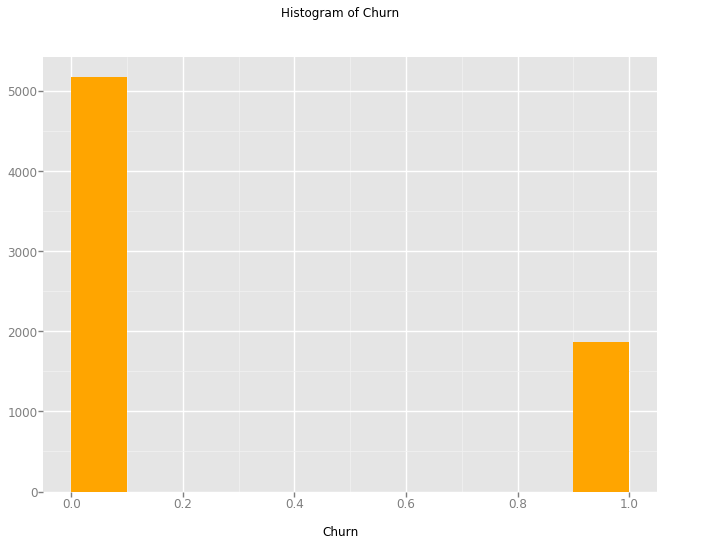

<ggplot: (-9223372029325810288)>

In [18]:
ggplot(aes(x='Churn'), data=Customer) + \
        geom_histogram(fill = 'orange' ) +\
        ggtitle('Histogram of Churn')

__Then explore the correlations of "Churn" with other variables:__.    
Relatively , Internetservice is the most positively correlated to Churn while Contact and Tenure are negatively correlated to Churn.

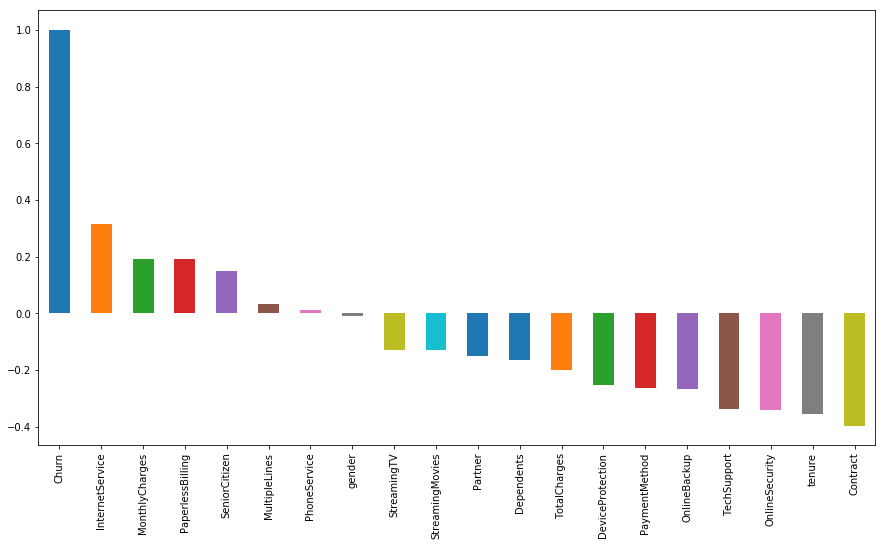

In [19]:
plt.figure(figsize=(15,8))
Customer.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

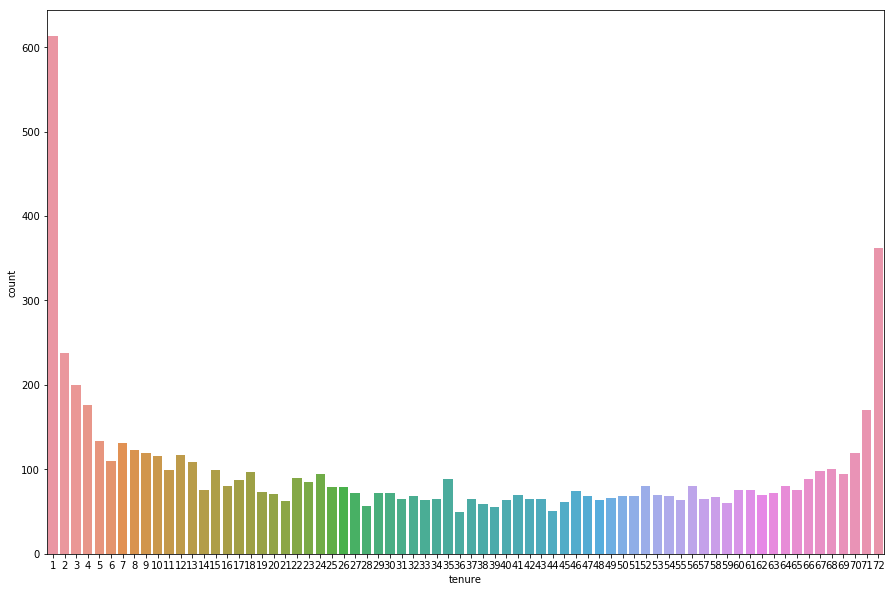

In [20]:
plt.figure(figsize = (15,10))
sns.countplot(Customer['tenure'])

In [21]:
pd.crosstab(Customer['Churn'], Customer['SeniorCitizen'], rownames=['Churn'])

SeniorCitizen,0,1
Churn,,
0,4497,666
1,1393,476


### Machine Learning

Drop 'customerID' becuase it is irrelavent.

In [22]:
Customer_ = Customer.drop(['customerID'], axis=1)

Divide the data into variable and target then nomalize the data.

In [23]:
y = Customer_['Churn']
X = Customer_.drop(columns = ['Churn'])

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

#### Use 10-fold to split data in to train and test

In [24]:
kf = KFold(n_splits=10,shuffle=True)

In [25]:
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#### Fit the model

In [26]:
model = LogisticRegression()
result = model.fit(X_train,  y_train)

#### Evaluate the model

In [27]:
scores = cross_val_score(result, X, y, cv=10)
scores 

array([0.79119318, 0.81107955, 0.80397727, 0.81934566, 0.78236131,
       0.79516358, 0.81081081, 0.81081081, 0.80227596, 0.8048433 ])

In [28]:
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8051209103840683


In [29]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values(ascending = False)

InternetService     1.762598
TotalCharges        1.408455
StreamingTV         0.336709
MultipleLines       0.303837
StreamingMovies     0.300409
PaperlessBilling    0.298726
SeniorCitizen       0.234566
DeviceProtection   -0.019355
Partner            -0.039694
PhoneService       -0.040919
gender             -0.052243
OnlineBackup       -0.072991
Dependents         -0.159893
TechSupport        -0.345146
OnlineSecurity     -0.359936
PaymentMethod      -0.388425
MonthlyCharges     -0.554945
Contract           -1.375589
tenure             -3.303842
dtype: float64

## Model 2     Job Salary Prediction

### 1. Read and tidy the data

In [30]:
train = pd.read_csv('Train_rev1.csv')
train.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [31]:
train.columns.tolist()

['Id',
 'Title',
 'FullDescription',
 'LocationRaw',
 'LocationNormalized',
 'ContractType',
 'ContractTime',
 'Company',
 'Category',
 'SalaryRaw',
 'SalaryNormalized',
 'SourceName']

In [32]:
len(train)

244768

In [33]:
train.dtypes

Id                     int64
Title                 object
FullDescription       object
LocationRaw           object
LocationNormalized    object
ContractType          object
ContractTime          object
Company               object
Category              object
SalaryRaw             object
SalaryNormalized       int64
SourceName            object
dtype: object

__Deal with null values__       
We can see that great number of null values exists.  Because we have limited columns but adequate rows, we only drop 'ContractType'.

In [34]:
train.isnull().sum()

Id                         0
Title                      1
FullDescription            0
LocationRaw                0
LocationNormalized         0
ContractType          179326
ContractTime           63905
Company                32430
Category                   0
SalaryRaw                  0
SalaryNormalized           0
SourceName                 1
dtype: int64

In [35]:
train = train.drop(['ContractType'], axis=1)

In [36]:
train.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


Then, drop all the null values.

In [37]:
train = train.dropna()

In [38]:
len(train)

161887

In [39]:
train.isnull().sum()

Id                    0
Title                 0
FullDescription       0
LocationRaw           0
LocationNormalized    0
ContractTime          0
Company               0
Category              0
SalaryRaw             0
SalaryNormalized      0
SourceName            0
dtype: int64

### 2. Explore the data

__First, describe and visuliaze the target 'SalaryNormalized'__      
There are more customers did not churned than did.

In [40]:
train['SalaryNormalized'].describe()

count    161887.000000
mean      34900.535441
std       17007.053153
min        5000.000000
25%       22500.000000
50%       31000.000000
75%       42500.000000
max      200000.000000
Name: SalaryNormalized, dtype: float64

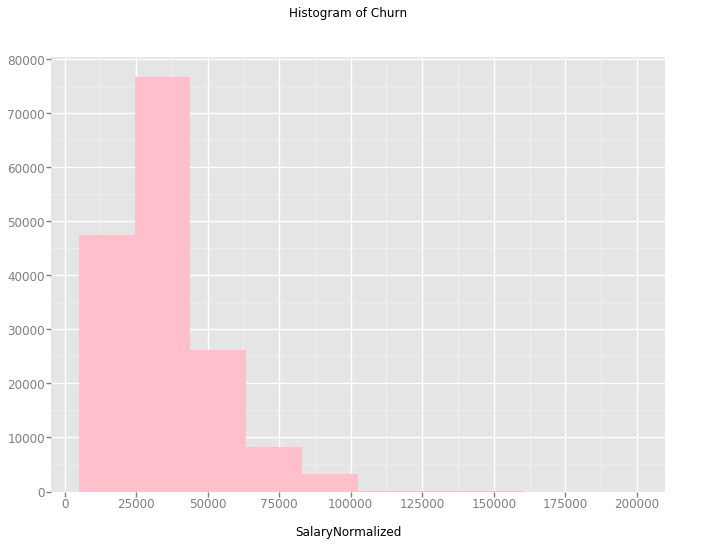

<ggplot: (7557386104)>

In [41]:
ggplot(aes(x='SalaryNormalized'), data=train) + \
        geom_histogram(fill = 'pink' ) +\
        ggtitle('Histogram of Churn')

__Overview of the Category columns__

Text(0.5,1,'Frequency of Categories')

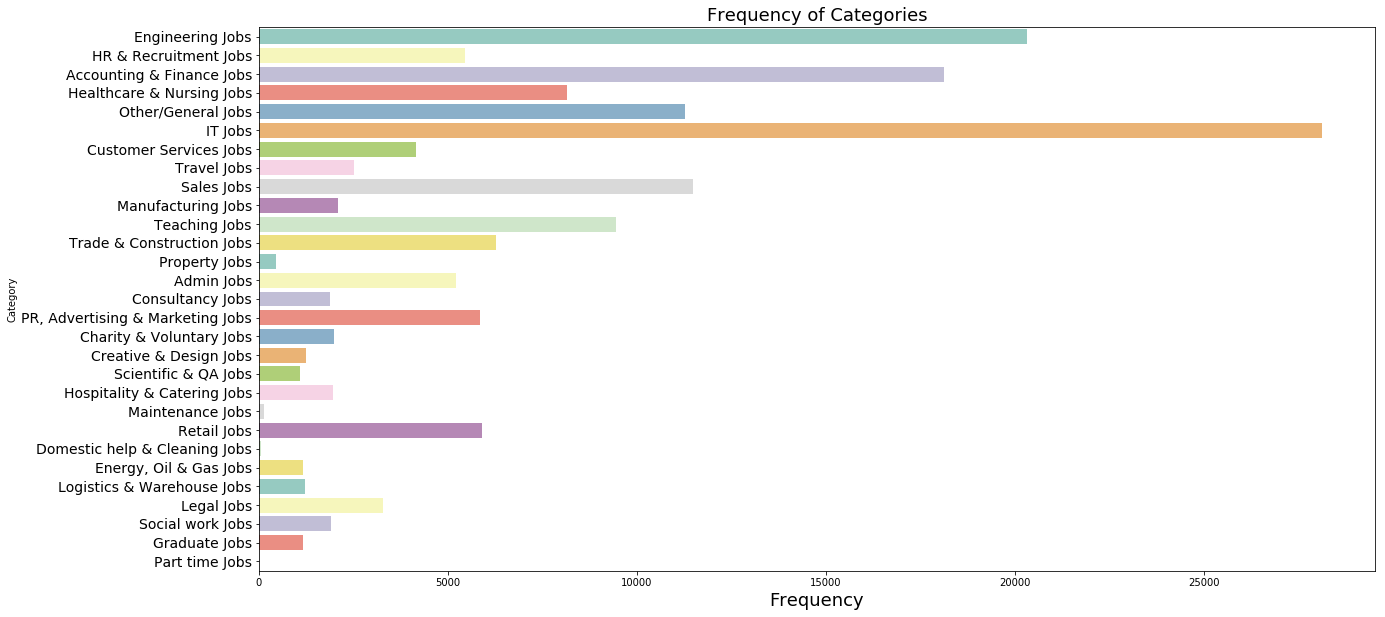

In [42]:
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(y='Category', data=train, palette="Set3")
ax.set_yticklabels(ax.get_yticklabels(),fontsize=14)
ax.set_xlabel("Frequency",fontsize=18)
ax.set_ylabel("Category",fontsize=10)
ax.set_title("Frequency of Categories",fontsize=18)

### 3. Configure the data for machine learning      

__Drop unrelated columns__         
The columns Id, SourceName and FullDescription is unrelated. The column LocationRaw is duplicated with LocationNormalized while SalaryRaw should be target, however, I choose SalaryNormalized to be the target.

In [43]:
train1 = train.drop(['Id'], axis=1).drop(['FullDescription'], axis=1).drop(['SalaryRaw'], axis=1).drop(['SourceName'], axis=1).drop(['LocationRaw'], axis=1)

In [44]:
train1.head(2)

,Title,LocationNormalized,ContractTime,Company,Category,SalaryNormalized
0,Engineering Systems Analyst,Dorking,permanent,Gregory Martin International,Engineering Jobs,25000
1,Stress Engineer Glasgow,Glasgow,permanent,Gregory Martin International,Engineering Jobs,30000


__Encode the categorical data__

In [45]:
en = LabelEncoder()

train1['Title'] = en.fit_transform(train1['Title'])
train1['LocationNormalized'] = en.fit_transform(train1['LocationNormalized'])
train1['ContractTime'] = en.fit_transform(train1['ContractTime'])
train1['Company'] = en.fit_transform(train1['Company'])
train1['Category'] = en.fit_transform(train1['Category'])


__ Split the data into independent variable and dependent variable and normalized the data__

In [46]:
y = train1['SalaryNormalized']
X = train1.drop(columns = ['SalaryNormalized'])

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

__Use Kfold to split the data into test and train__

In [47]:
kf = KFold(n_splits=10,shuffle=True)

In [48]:
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

__First, use linear regression model__     
The accuracy score shows that the model is not ideal.

In [49]:
model = linear_model.LinearRegression(fit_intercept = True)
fit = model.fit(X_train,y_train)
score = model.score(X_test, y_test)

pred = model.predict(X_test)
r2 = r2_score(y_test,pred) 
print ('R-squared: %.4f' % (r2))

R-squared: 0.0083


__Then, we try random forest regression model__     
The accuracy score shows that the model is much better.

In [52]:
rfr = RFR(random_state=0)
result  = rfr.fit(X_train, y_train)

pred = rfr.predict(X_test)
r2 = r2_score(y_test,pred) 
print ('R-squared: %.4f' % (r2))

R-squared: 0.4297


In [53]:
scores = cross_val_score(result, X, y, cv=10)
scores 

array([0.36924348, 0.38911932, 0.35300374, 0.41975988, 0.36941543,
       0.40517319, 0.39277378, 0.38672451, 0.39317141, 0.38059053])